<a href="https://colab.research.google.com/github/Dedeepyamaddi/Data-Analytics/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26 

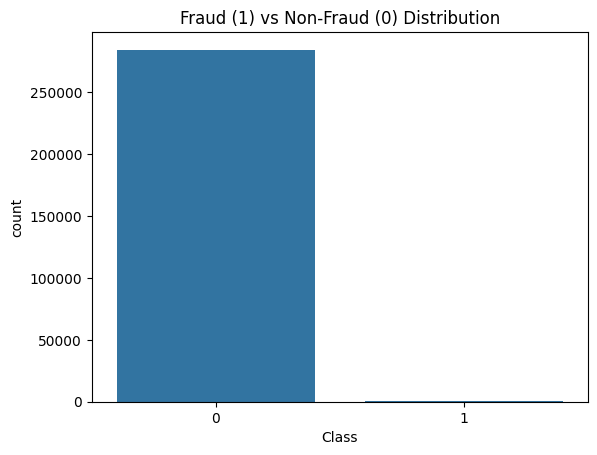


Logistic Regression Model Evaluation
Confusion Matrix:
 [[85280    15]
 [   57    91]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9555491038256734

Decision Tree Model Evaluation
Confusion Matrix:
 [[85269    26]
 [   39   109]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.74      0.77       148

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.8680908310268177

Random Forest Model Evaluation
Confusion Matrix:
 [[85290  

In [3]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 2. Load Dataset
df = pd.read_csv("/content/creditcard.csv")
print("Shape:", df.shape)
print(df.head())

# 3. Check for class imbalance
print("\nClass Distribution:\n", df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title("Fraud (1) vs Non-Fraud (0) Distribution")
plt.show()

# 4. Preprocess Data
X = df.drop(['Class', 'Time'], axis=1)  # Remove 'Time' as it's not very predictive
y = df['Class']

# Remove rows with NaN values in y
nan_mask = y.isna()
X = X[~nan_mask]
y = y[~nan_mask]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 6. Define Evaluation Function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Evaluation")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# 7. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
evaluate_model("Logistic Regression", lr, X_test, y_test)

# 8. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree", dt, X_test, y_test)

# 9. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest", rf, X_test, y_test)